In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [2]:
from Code import plot_physio

## Set Paths and Parameters

In [3]:
# ToDo: Adapt wave and problematic subject list
wave = 2

In [4]:
dir_path = os.getcwd()
dir_path = os.path.abspath(os.path.join(dir_path, os.pardir))
# ToDo: Adapt folder name
file_path = os.path.join(dir_path, f'Data-Wave{wave}')

In [5]:
SA_score="SPAI"

## Physiology

In [6]:
save_path = os.path.join(dir_path, f'Plots-Wave{wave}', 'Physiology')
if not os.path.exists(save_path):
    print('creating path for saving')
    os.makedirs(save_path)

100%|██████████| 1000/1000 [02:35<00:00,  6.41it/s]


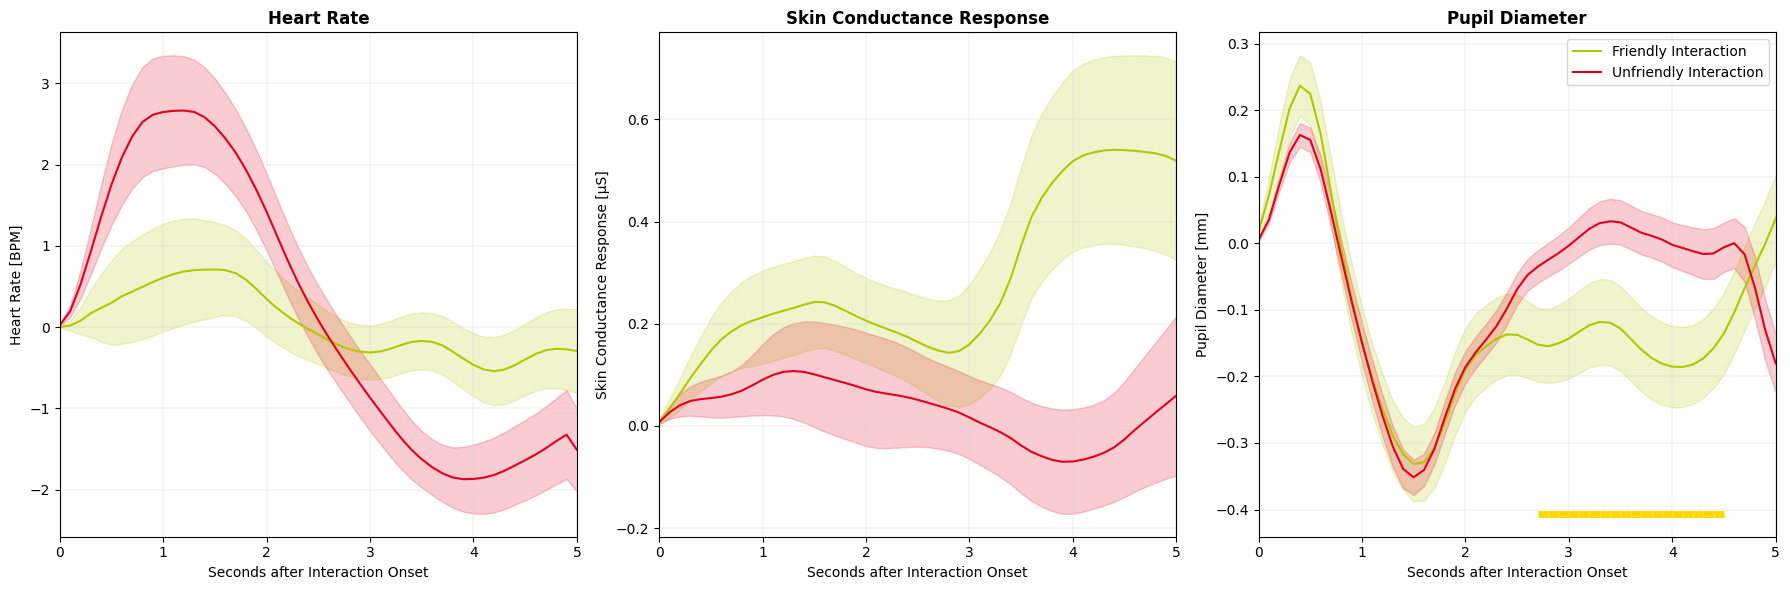

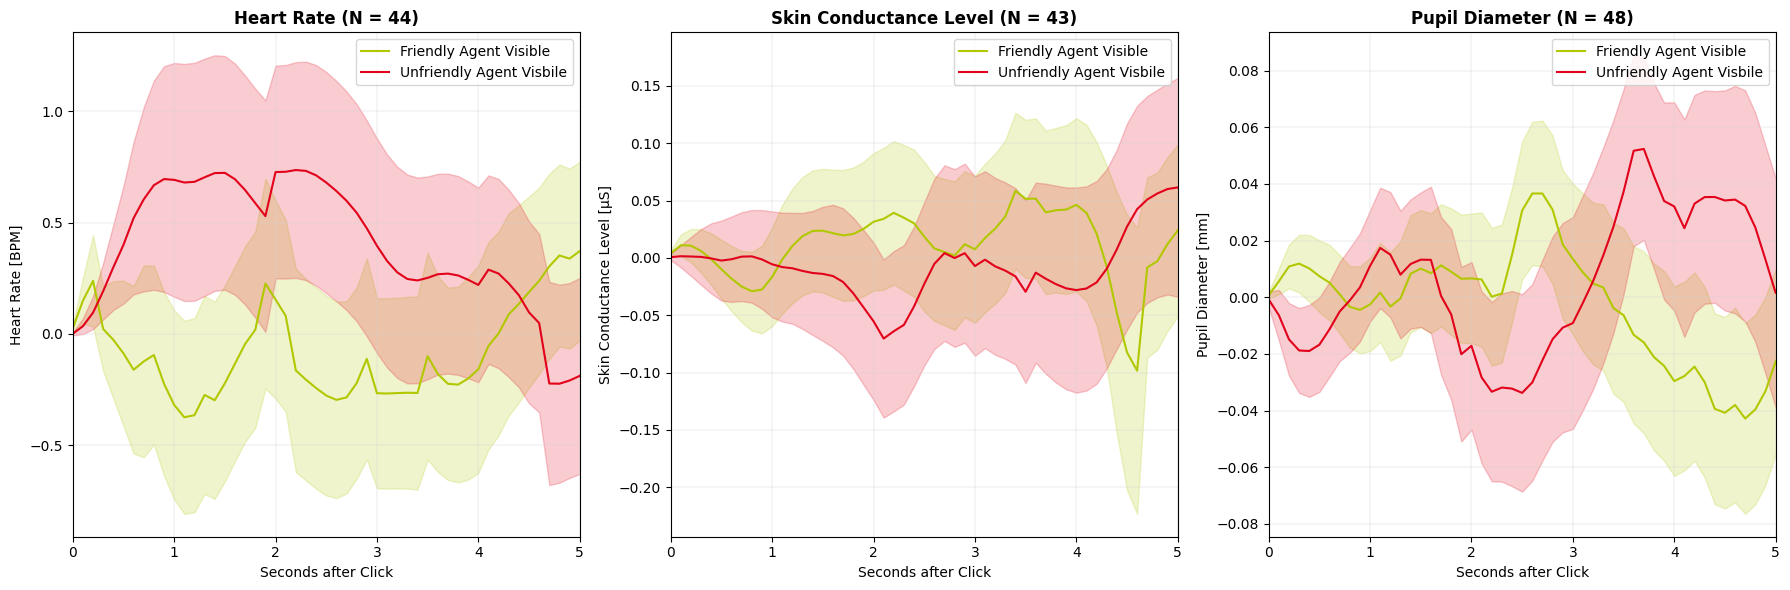

In [17]:
plot_physio.plot_physio_acq(file_path)
plt.savefig(os.path.join(save_path, f"physiology_acq.png"), dpi=300)

if wave == 1:
    plot_physio.plot_physio_click(file_path)
    plt.savefig(os.path.join(save_path, f"physiology_click.png"), dpi=300)
    
elif wave == 2:
    plot_physio.plot_physio_visible(file_path)
    plt.savefig(os.path.join(save_path, f"physiology_vis.png"), dpi=300)

SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Physio (fhr) Test (Condition, Phase and SPAI)
SPAI Main Effect, F(1, 42.0)=0.76, p=0.389, p_eta_2=0.01
Phase Main Effect, F(2, 81.5)=2.61, p=0.08, p_eta_2=0.06
Interaction SPAI x Phase, F(2, 81.4)=1.36, p=0.263, p_eta_2=0.03
P-values adjusted by holm method for 3 comparisons
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial contrasts)
ANOVA: Physio (feda) Test (Condition, Phase and SPAI)
SPAI Main Effect, F(1, 44.1)=0.04, p=0.844, p_eta_2=0.0
Phase Main Effect, F(2, 85.4)=9.22, p=0.0, p_eta_2=0.17
Interaction SPAI x Phase, F(2, 85.3)=0.19, p=0.824, p_eta_2=0.0
P-values adjusted by holm method for 3 comparisons
SS Type III Analysis of Variance Table with Satterthwaite approximated degrees of freedom:
(NOTE: Model refit with orthogonal polynomial con

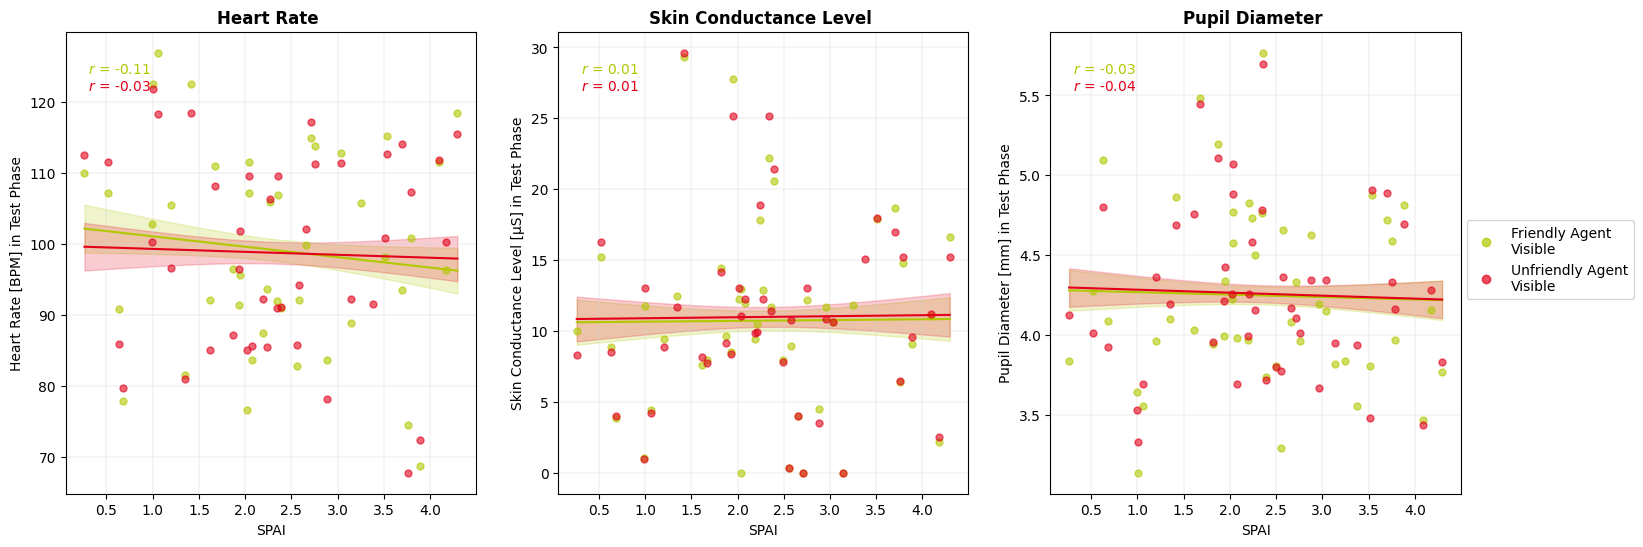

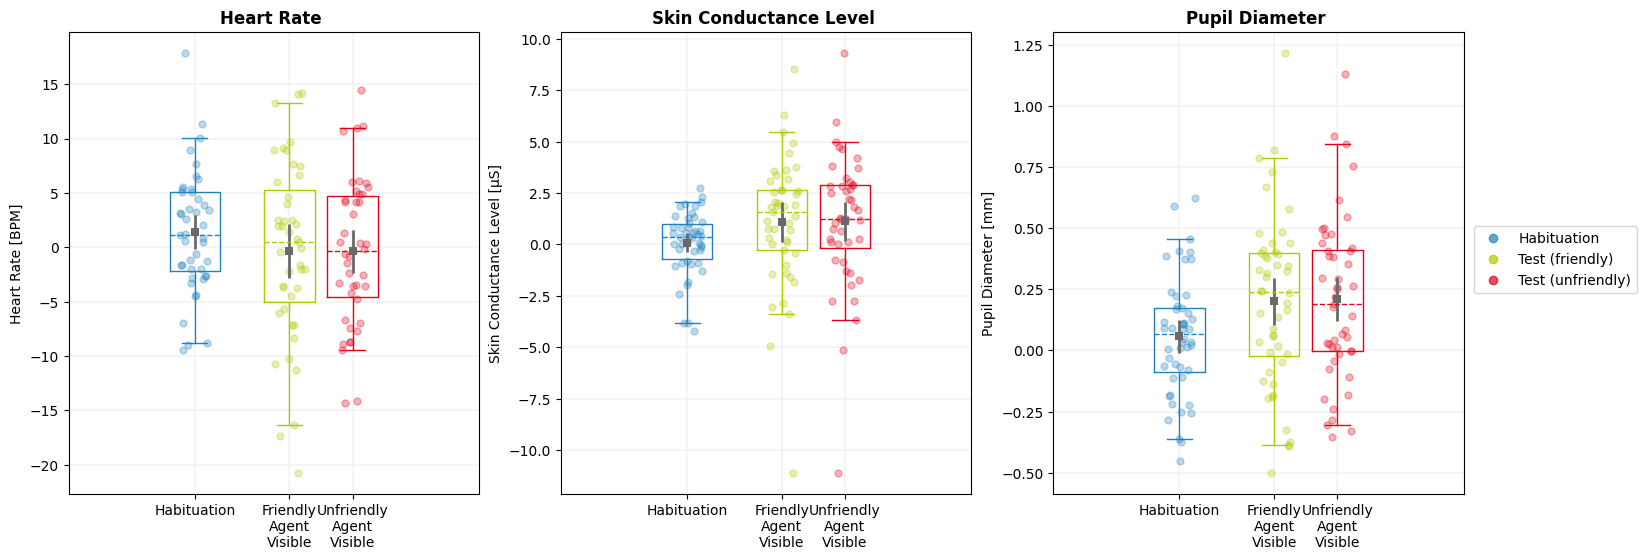

In [7]:
SA_score = "SPAI"
plot_physio.plot_physio_test_sad(file_path, SA_score)
plt.savefig(os.path.join(save_path, f"physiology_test_{SA_score}.png"), dpi=300, bbox_inches="tight")

plot_physio.plot_physio_diff(file_path, SA_score)
plt.savefig(os.path.join(save_path, f"physiology_hab-test.png"), dpi=300, bbox_inches="tight")

if wave == 1:
    plot_physio.plot_physio_diff_sad(file_path, SA_score)
    plt.savefig(os.path.join(save_path, f"physiology_hab-test_{SA_score}.png"), dpi=300, bbox_inches="tight")